# **Import Needed Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE, chi2,f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from alibi.explainers import ALE
from alibi.explainers.ale import plot_ale
from sklearn.inspection import permutation_importance
from lime.lime_tabular import LimeTabularExplainer
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import PartialDependenceDisplay


In [ ]:
df = pd.read_csv("/content/Super_Store_Data_After_EDA (1).csv", encoding='latin1')

In [ ]:
pip install pandas scikit-learn xgboost


**Spliting the Data**

In [ ]:
#get the median and make a condation for target col insted of being a continous data(ogistic works on probability values)
median_sales = df['Sales'].median()
df['Hights_Sales'] = (df['Sales'] >= median_sales).astype(int)

In [ ]:
print(df['Hights_Sales'].value_counts())    #Assumption one (Appropriate Outcome Type)

Hights_Sales
1    2055
0      65
Name: count, dtype: int64


In [ ]:
x = df.drop(['Sales','Hights_Sales'], axis=1)
y = df['Hights_Sales']

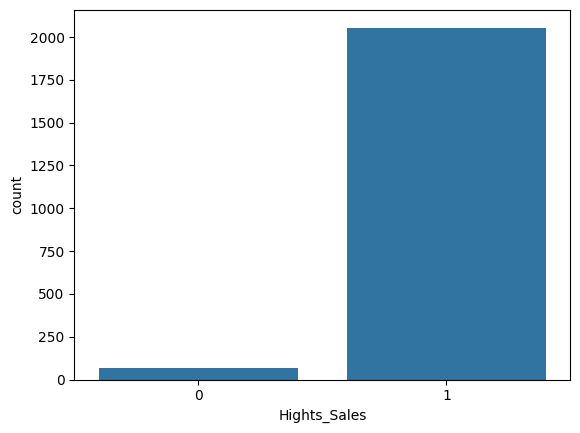

In [ ]:
sns.countplot(x='Hights_Sales', data=df)
plt.show()

In [ ]:
resambel = RandomOverSampler(random_state=42)
X_resampled, y_resampled = resambel.fit_resample(x, y)
print(y_resampled.value_counts())

Hights_Sales
1    2055
0    2055
Name: count, dtype: int64


In [ ]:
balanced_df = pd.DataFrame(X_resampled, columns=x.columns)
balanced_df['Hights_Sales'] = y_resampled

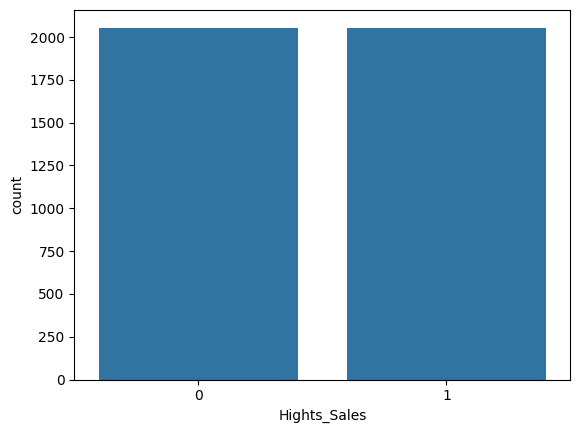

In [ ]:
sns.countplot(x='Hights_Sales', data=balanced_df)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Trian the data**

In [ ]:
#Standarized the numerical col
scaler = StandardScaler()
x_trained_scaled = scaler.fit_transform(X_train)
x_tested_scaled = scaler.transform(X_test)

#**1- Random Forest Model Training**

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [ ]:
rf_mse = mean_squared_error(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)
print("Random Forest Regressor Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"R² Score: {rf_r2:.4f}")

Random Forest Regressor Evaluation Metrics:
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.02
R² Score: 0.9615


#**Explainability Techniques:-**

#**1- PDP Plots for Random Forest**

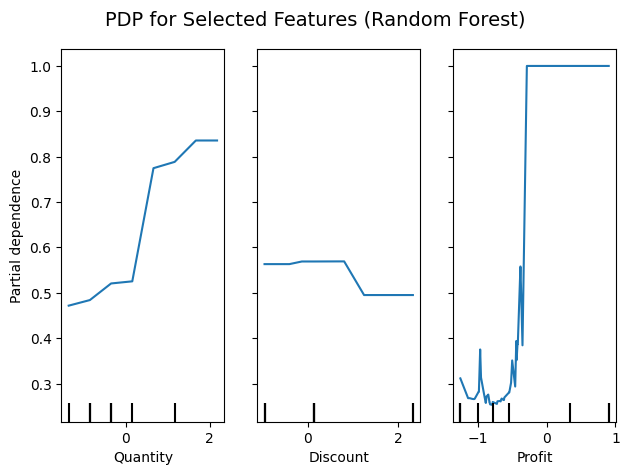

In [ ]:
feature_idx = [10, 11, 12]
feature_names = X_train.columns

PartialDependenceDisplay.from_estimator(
    rf_model, X_test, features=feature_idx, feature_names=feature_names
)
plt.suptitle("PDP for Selected Features (Random Forest)", fontsize=14)
plt.tight_layout()
plt.show()

#**PDP Get raw values For Random Forest**

In [ ]:
# Get raw values (average and grid values)
pdp_result_rf = partial_dependence(rf_model, X_test, features=feature_idx)
print("Random Forest PDP - Average Values:\n", pdp_result_rf["average"])
print("Random Forest PDP - Grid Values:\n", pdp_result_rf["grid_values"])

Random Forest PDP - Average Values:
 [[[[0.54340308 0.25293015 0.25293015 ... 1.         1.
    1.        ]
   [0.54340308 0.25293015 0.25293015 ... 1.         1.
    1.        ]
   [0.5424205  0.25070894 0.25070894 ... 1.         1.
    1.        ]
   ...
   [0.24650937 0.25120778 0.25120778 ... 1.         1.
    1.        ]
   [0.24650937 0.25120778 0.25120778 ... 1.         1.
    1.        ]
   [0.24650937 0.25120778 0.25120778 ... 1.         1.
    1.        ]]

  [[0.57964585 0.25455007 0.25455007 ... 1.         1.
    1.        ]
   [0.57964585 0.25455007 0.25455007 ... 1.         1.
    1.        ]
   [0.57910014 0.25370601 0.25370601 ... 1.         1.
    1.        ]
   ...
   [0.29884962 0.25420486 0.25420486 ... 1.         1.
    1.        ]
   [0.29884962 0.25420486 0.25420486 ... 1.         1.
    1.        ]
   [0.29884962 0.25420486 0.25420486 ... 1.         1.
    1.        ]]

  [[0.6507496  0.30086386 0.30086386 ... 1.         1.
    1.        ]
   [0.6507496  0.30086

#**2- ICE Plots For Random Forest**

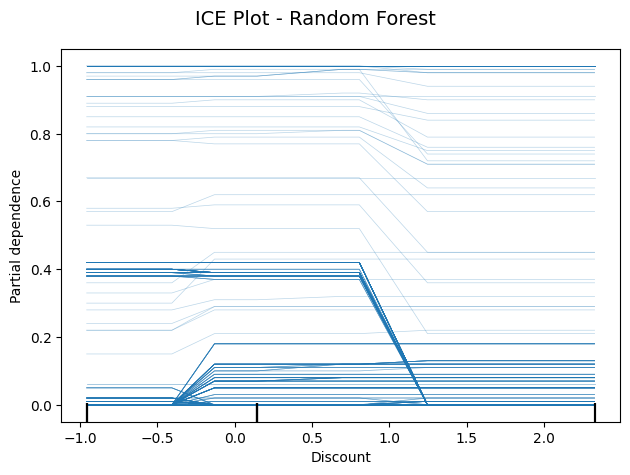

In [ ]:
feature_idx = [11]

PartialDependenceDisplay.from_estimator(
    rf_model,
    X_test,
    features=feature_idx,
    kind='individual',
    feature_names=X_train.columns
)
plt.suptitle("ICE Plot - Random Forest", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
pip install alibi


#**3- ALE Plots For Random Forest**

In [ ]:
# For classification (probabilities)
proba_fun_rf = rf_model.predict

In [ ]:
ale_rf = ALE(
    proba_fun_rf,
    feature_names=X_train.columns.tolist(),
    target_names=["target"]
)
exp_rf = ale_rf.explain(X_train.values)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


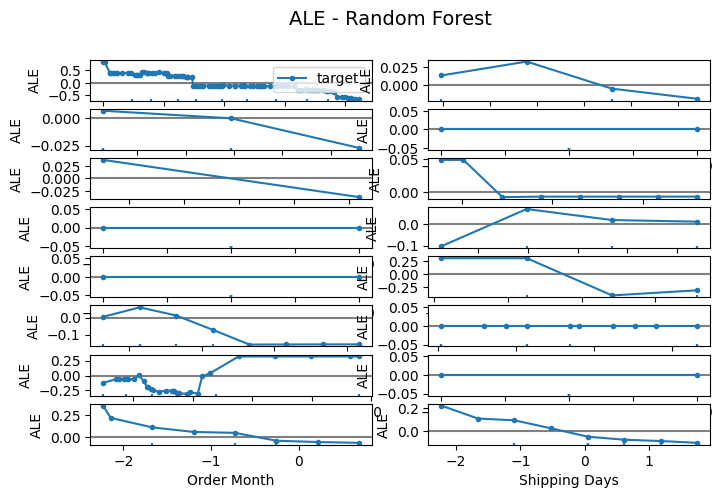

In [ ]:
plot_ale(exp_rf, n_cols=2, fig_kw={'figwidth': 8, 'figheight': 5}, sharey=None)
plt.suptitle("ALE - Random Forest", fontsize=14)
plt.show()


#**4- Permutation Importance for Random Forest**

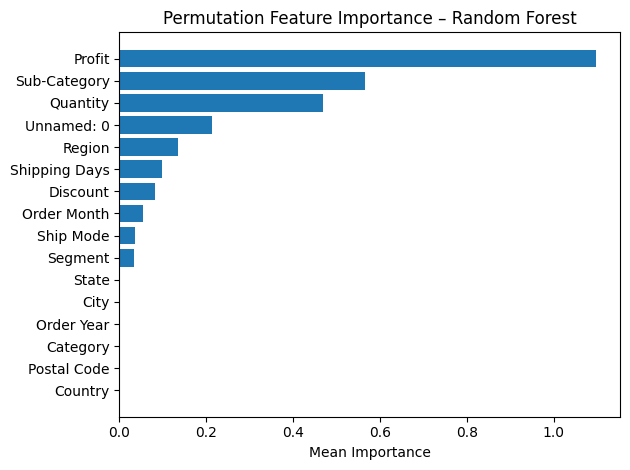

In [ ]:
# Permutation importance for Random Forest
result_rf = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx_rf = result_rf.importances_mean.argsort()

# Plot
plt.barh(X_test.columns[sorted_idx_rf], result_rf.importances_mean[sorted_idx_rf])
plt.title("Permutation Feature Importance – Random Forest")
plt.xlabel("Mean Importance")
plt.tight_layout()
plt.show()


In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=bef3171bed3234f04e7bc24589686b96d47cfa036b453e60cf7fc459c41d7063
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


#**5- Lime For Random Forest**

In [ ]:
explainer_rf = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=np.unique(y_train).astype(str),
    mode='regression'
)

i = 0
exp_rf = explainer_rf.explain_instance(
    data_row=X_test.iloc[i].values,
    predict_fn=rf_model.predict
)

exp_rf.show_in_notebook(show_table=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#**6- Shap For Random Forest**

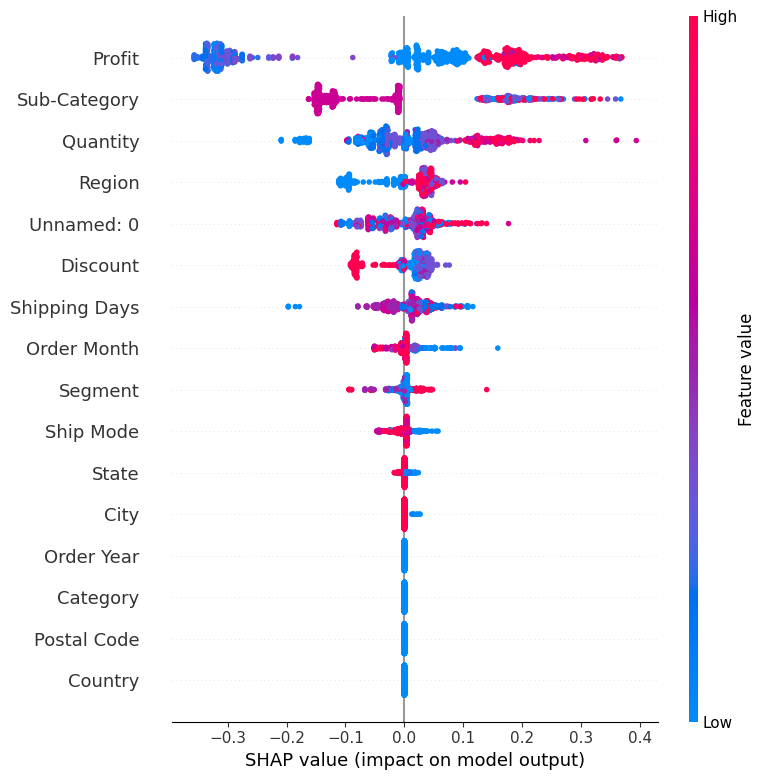

In [ ]:
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0,:])